<h1>How to understand data statistically through plotting </h1>
<br>
Seaborn is another library built on top of matplotlib that integrates closely with pandas dataframes. It’s especially known for its aesthetics and built-in statistical features in plots. 

<p class="lead"> 
Table of Contents: 

- <a href="#Why-do-we-use-seaborn?">Why do we use seaborn?</a>
- <a href="#Seaborn-plotting-syntax">Seaborn plotting syntax</a>    
- <a href="#Create-statistical-plots">Create statistical plots</a>
- <a href="#Visualizing-multiple-relationships">Visualizing multiple relationships</a>

    
</p>





<div>
<h2 class="breadcrumb">Why do we use seaborn?</h2><p>
</div>

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. (seaborn.pydata.org)

- The syntax is simple and easy to use. 
- Seaborn provides out-of-box nice looking plots. Check out the [example gallery](https://seaborn.pydata.org/examples/index.html) for inspiration. 
- It's natural to include statistical information in your plots using Seaborn. 

<div>
<h2 class="breadcrumb">Seaborn plotting syntax</h2><p>
</div>

Import libraries and data:

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('../datasets/mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<div class="alert alert-success">
<h4>Tips</h4>

- Use `sns.set_theme()` for default Seaborn theme.

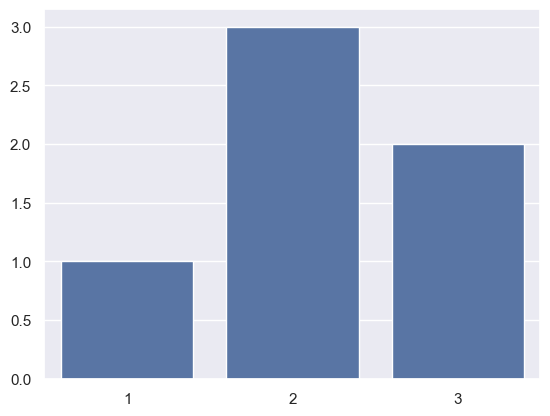

In [3]:
sns.set_theme()
sns.barplot(x=[1,2,3], y=[1, 3, 2]);

## Axes-level functions 
Axes-level functions plot data onto a single `matplotlib.pyplot.Axes` object.

### Histogram

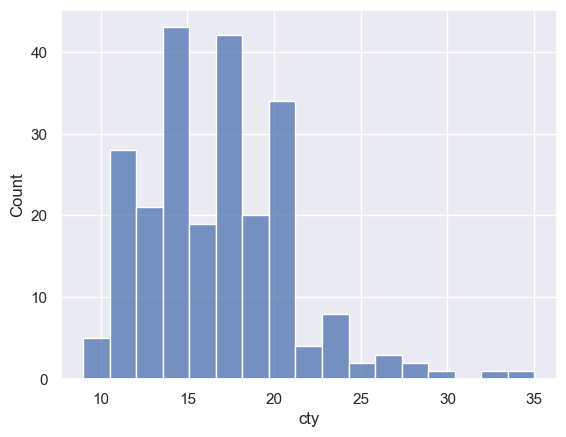

In [6]:
sns.histplot(data=df, x='cty');

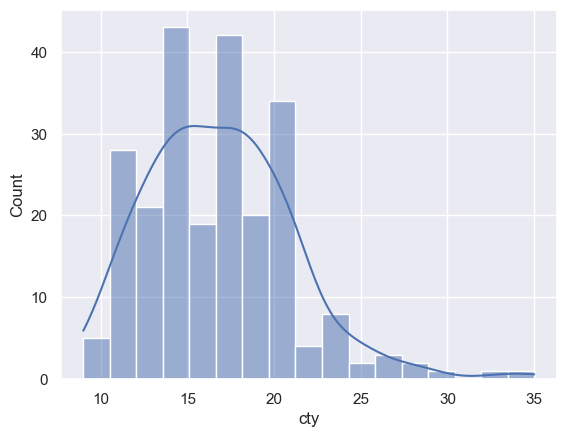

In [7]:
sns.histplot(data=df, x='cty', kde=True);

### Scatter plot

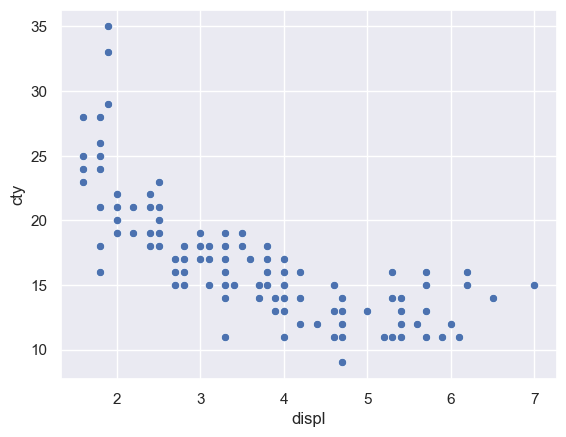

In [11]:
sns.scatterplot(data=df, x='displ', y='cty');

### Add `hue` to determine the color of plot elements

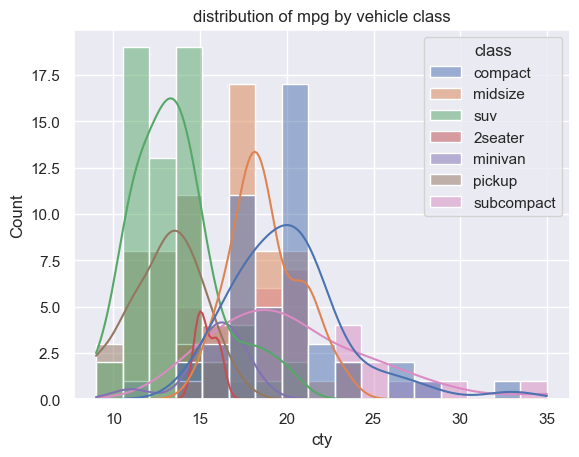

In [14]:
sns.histplot(data=df, x='cty', kde=True, hue='class').set(title='distribution of mpg by vehicle class');

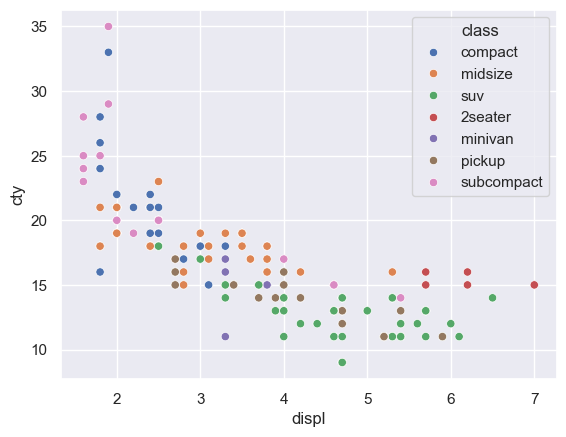

In [15]:
sns.scatterplot(data=df, x='displ', y='cty', hue='class');

### Show the counts of observations in each categorical bin using bars.



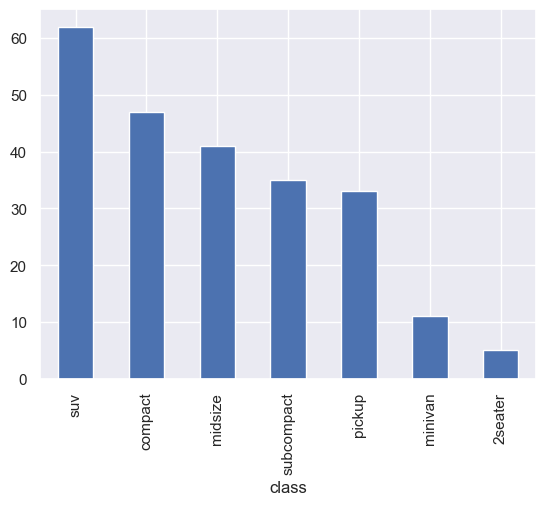

In [17]:
df['class'].value_counts().plot(kind='bar');

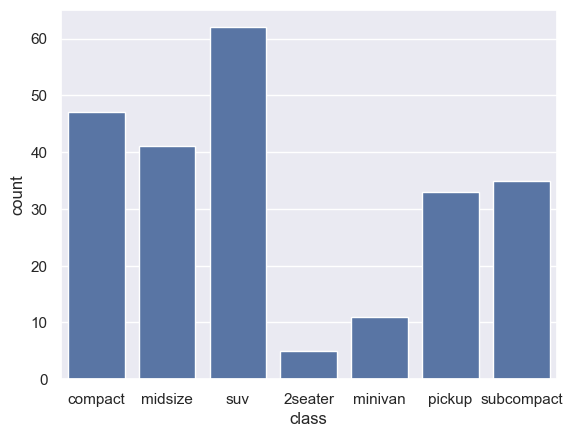

In [18]:
sns.countplot(data=df, x='class');

### Integrate with Matplotlib

> The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they also accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

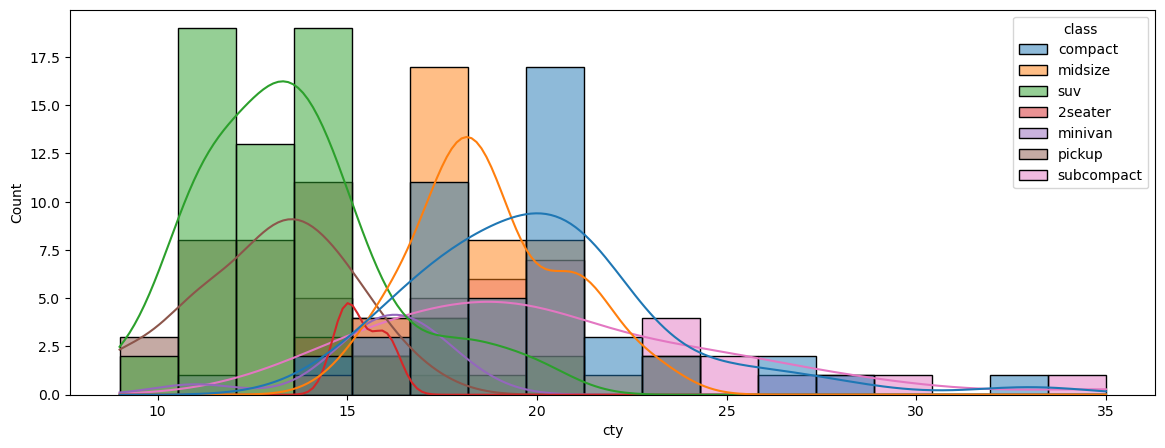

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,5))
sns.histplot(data=df, x='cty', kde=True, hue='class', ax=ax);


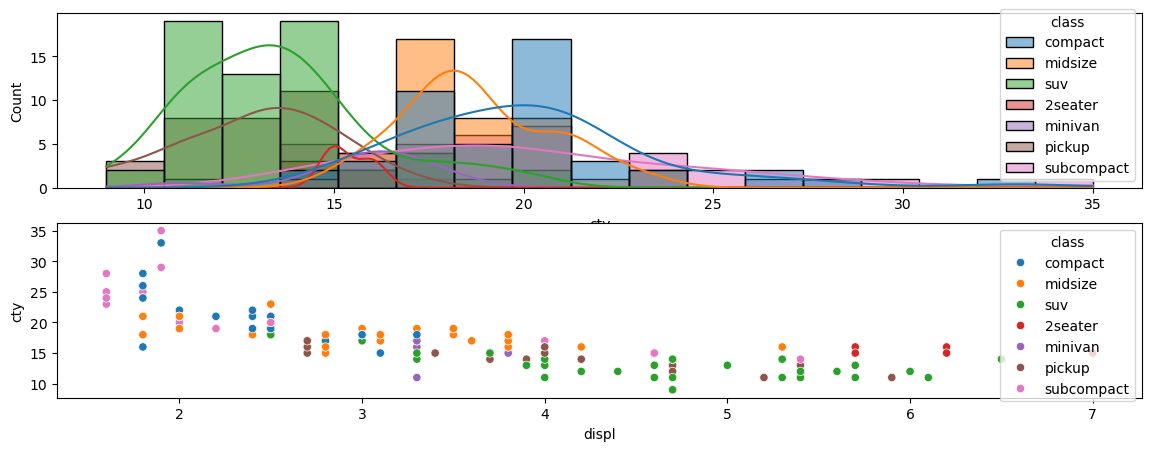

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,5))
sns.histplot(data=df, x='cty', kde=True, hue='class', ax=ax1);
sns.scatterplot(data=df, x='displ', y="cty", hue='class', ax=ax2);

<div class="alert alert-info">
<h4>Exercise</h4>

- Load the Penguins dataset from 'assets/penguins.csv' and call it `dfe`.  
- Use Seaborn to visualize the distribution of body mass, the relationship between flipper length and body mass, and visualize the differences among species. 

<details><summary><i><u>(Hint)</u><i></summary><br>
Use `hue='species'`.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe = pd.read_csv('assets/penguins.csv')
sns.histplot(data=dfe, x='body_mass_g', kde=True, hue='species');
sns.scatterplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
```
</details>
</details>
</div>

In [4]:
# exercise
penguins = pd.read_csv('../datasets/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


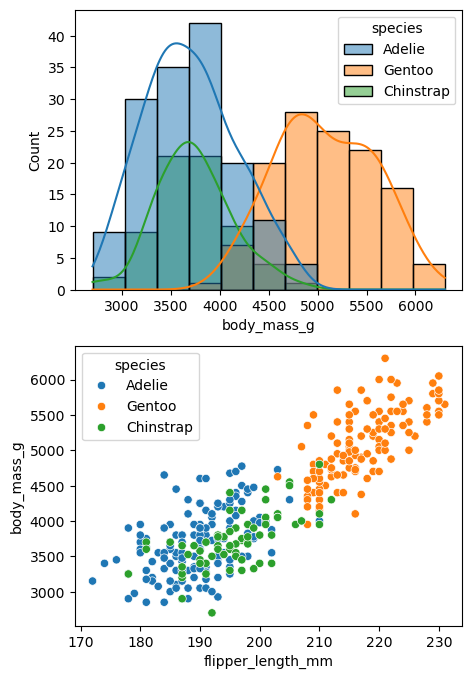

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8))
sns.histplot(data=penguins, x='body_mass_g', kde=True, hue='species', ax=ax1)
sns.scatterplot(data=penguins, x='flipper_length_mm', y="body_mass_g", hue='species', ax=ax2);

In [16]:
# Relational Graphs - sns.relplot
# - scatterplot & lineplot

# Distributional Graphs - sns.displot
# histplot, kdeplot, ecdfplot, rugplot

# Categorical Graphs - sns.catplot
# stripplot, swarmplot, boxplot, violinplot, pointplot, barplot

### Figure-level functions

<img id="Image1" src="assets/seaborn.jpeg" align="left"/>

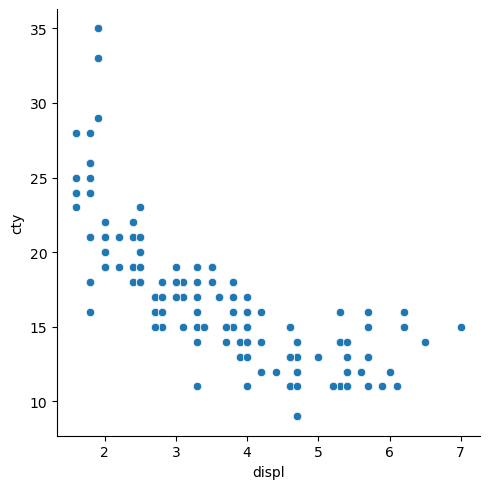

In [26]:
sns.relplot(data=df, x='displ', y='cty', kind='scatter');

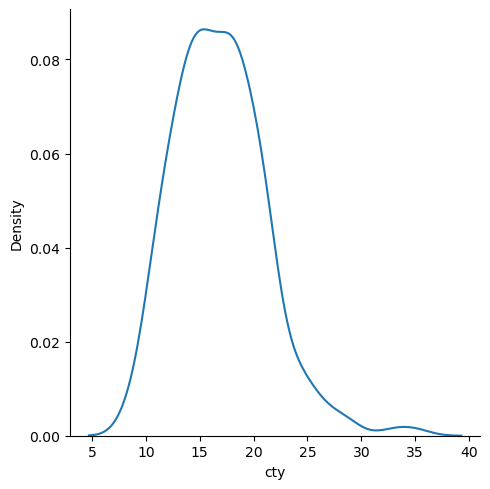

In [28]:
sns.displot(data=df, x='cty', kind='kde');

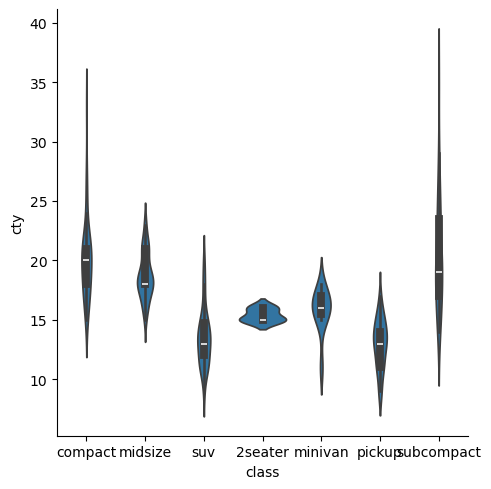

In [19]:
sns.catplot(data=df, x='class', y='cty', kind='violin');

<div class="alert alert-info">
<h4>Exercise</h4>

- Explore the Figure-level functions with the Penguins dataset.
- Use the Figure-level functions to visualize the distribution of body mass, the relationship between flipper length and body mass, and visualize the differences among species.

<details><summary><i><u>(Hint)</u><i></summary><br>
Use sns.displot and sns.relplot.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
sns.displot(data=dfe, x='body_mass_g', kind='hist', kde=True, hue='species');
sns.relplot(data=dfe, x='flipper_length_mm', y="body_mass_g", kind='scatter', hue='species');
```
</details>
</details>    
</div>

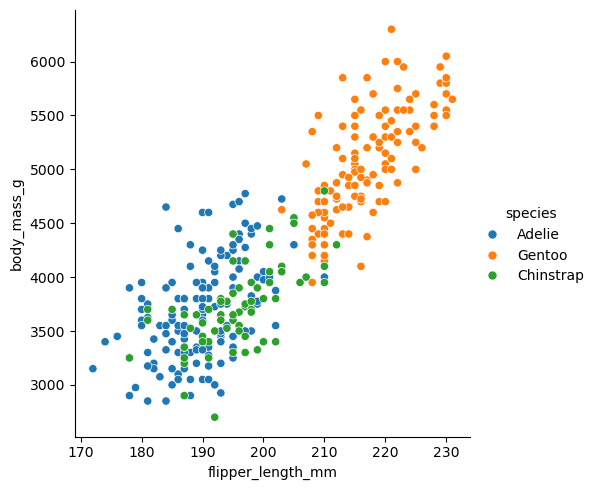

In [31]:
sns.relplot(data=penguins, x='flipper_length_mm', y="body_mass_g", kind='scatter', hue='species');

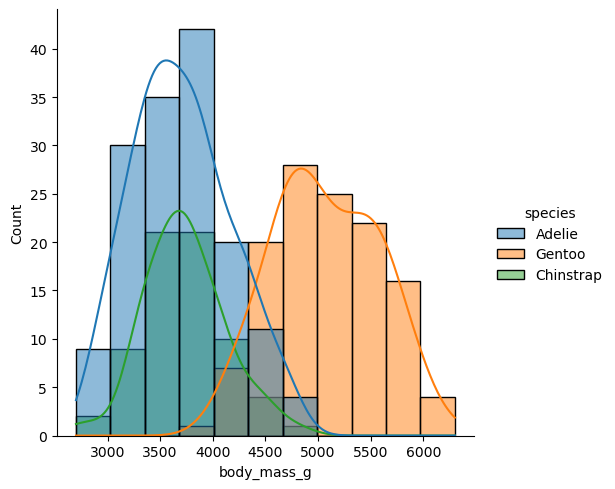

In [33]:
sns.displot(data=penguins, x='body_mass_g', kind='hist', kde=True, hue='species');

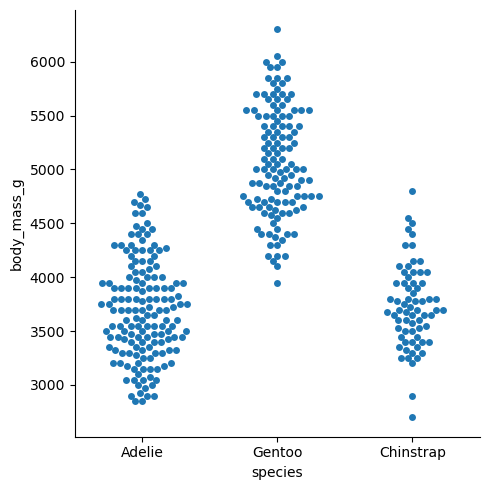

In [29]:
sns.catplot(data=penguins, x='species', y='body_mass_g', kind='swarm');

<div>
<h2 class="breadcrumb">Create statistical plots</h2><p>
</div>

### Plotting the confidence interval or standard deviation around the mean

- Default: plot 95% CI. 
> The default behavior in Seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.


- Define `ci='sd'`
> Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

C:\Users\rioca\anaconda3\envs\intro_to_python\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


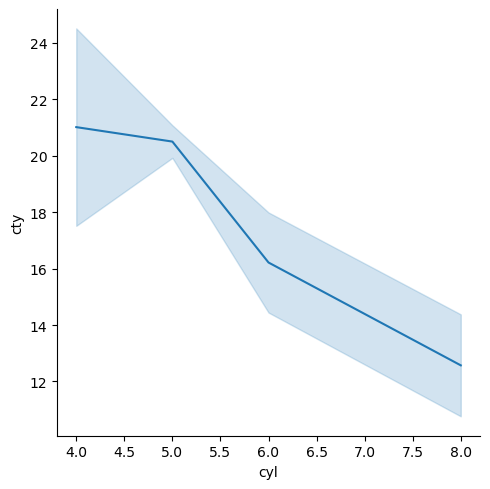

In [34]:
sns.relplot(data=df, x='cyl', y='cty', kind='line', ci='sd');

### Draw linear regression models

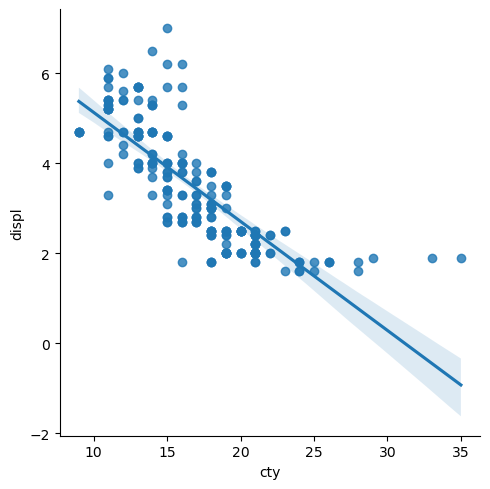

In [37]:
sns.lmplot(data=df, x='cty', y='displ');

Specify hue and markers for origin:

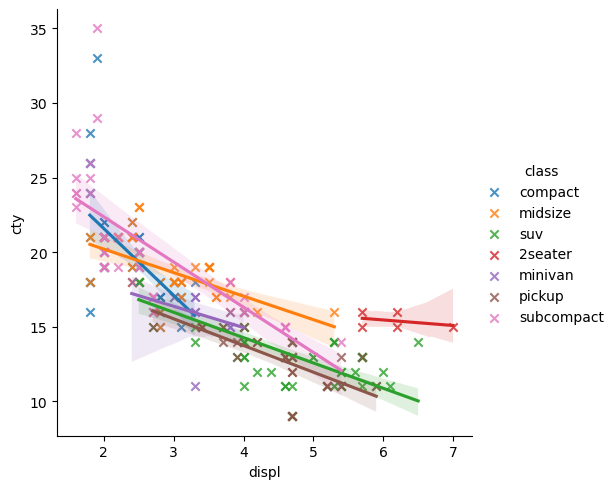

In [47]:
sns.lmplot(data=df, x="displ", y="cty", hue="class", markers='x');

Separate plot by origin in three columns:

In [49]:
# sns.lmplot(data=df, x="displ", y="cty", row="class");

<div class="alert alert-info">
<h4>Exercise</h4>

- Plot the relationship between flipper length and body mass, visualize the differences among species, and draw regression lines in those plots. 

<details><summary><i><u>(Hint)</u><i></summary><br>
Use sns.lmplot    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
sns.lmplot(data=dfe, x='flipper_length_mm', y="body_mass_g");
sns.lmplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
```
</details>
</details>
</div>

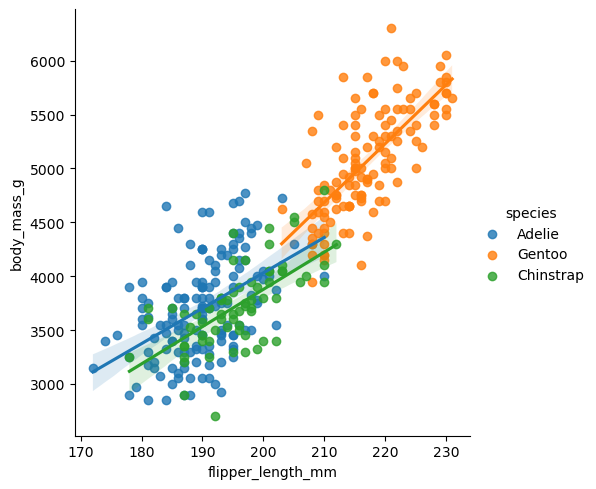

In [51]:
# exercise
sns.lmplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')

<div>
<h2 class="breadcrumb">Visualizing multiple relationships</h2><p>
</div>

>  `jointplot()` and `pairplot()` employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure.

> jointplot() focuses on a single relationship:

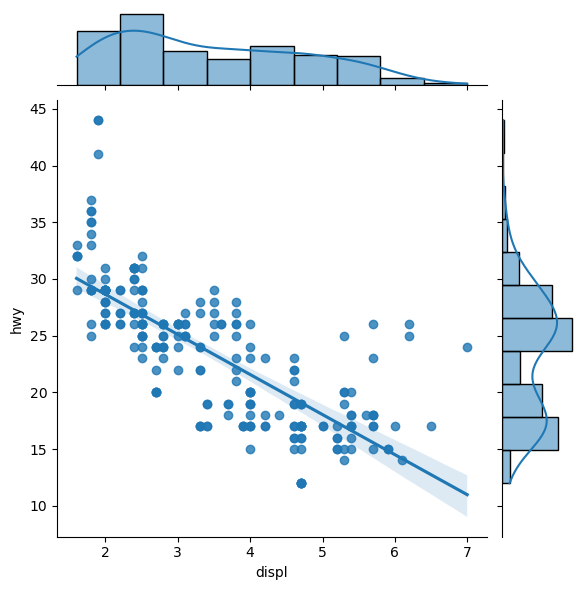

In [52]:
sns.jointplot(data=df, x="displ", y="hwy", kind="reg");

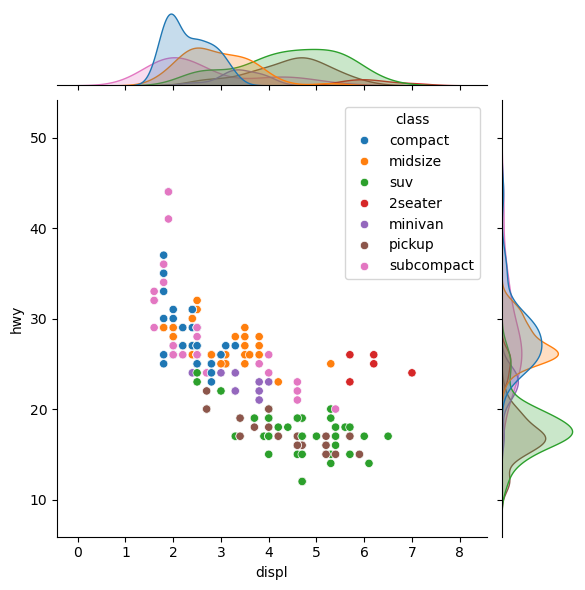

In [53]:
sns.jointplot(data=df, x="displ", y="hwy", hue='class');

> pairplot() visualizes every pairwise combination of variables simultaneously:

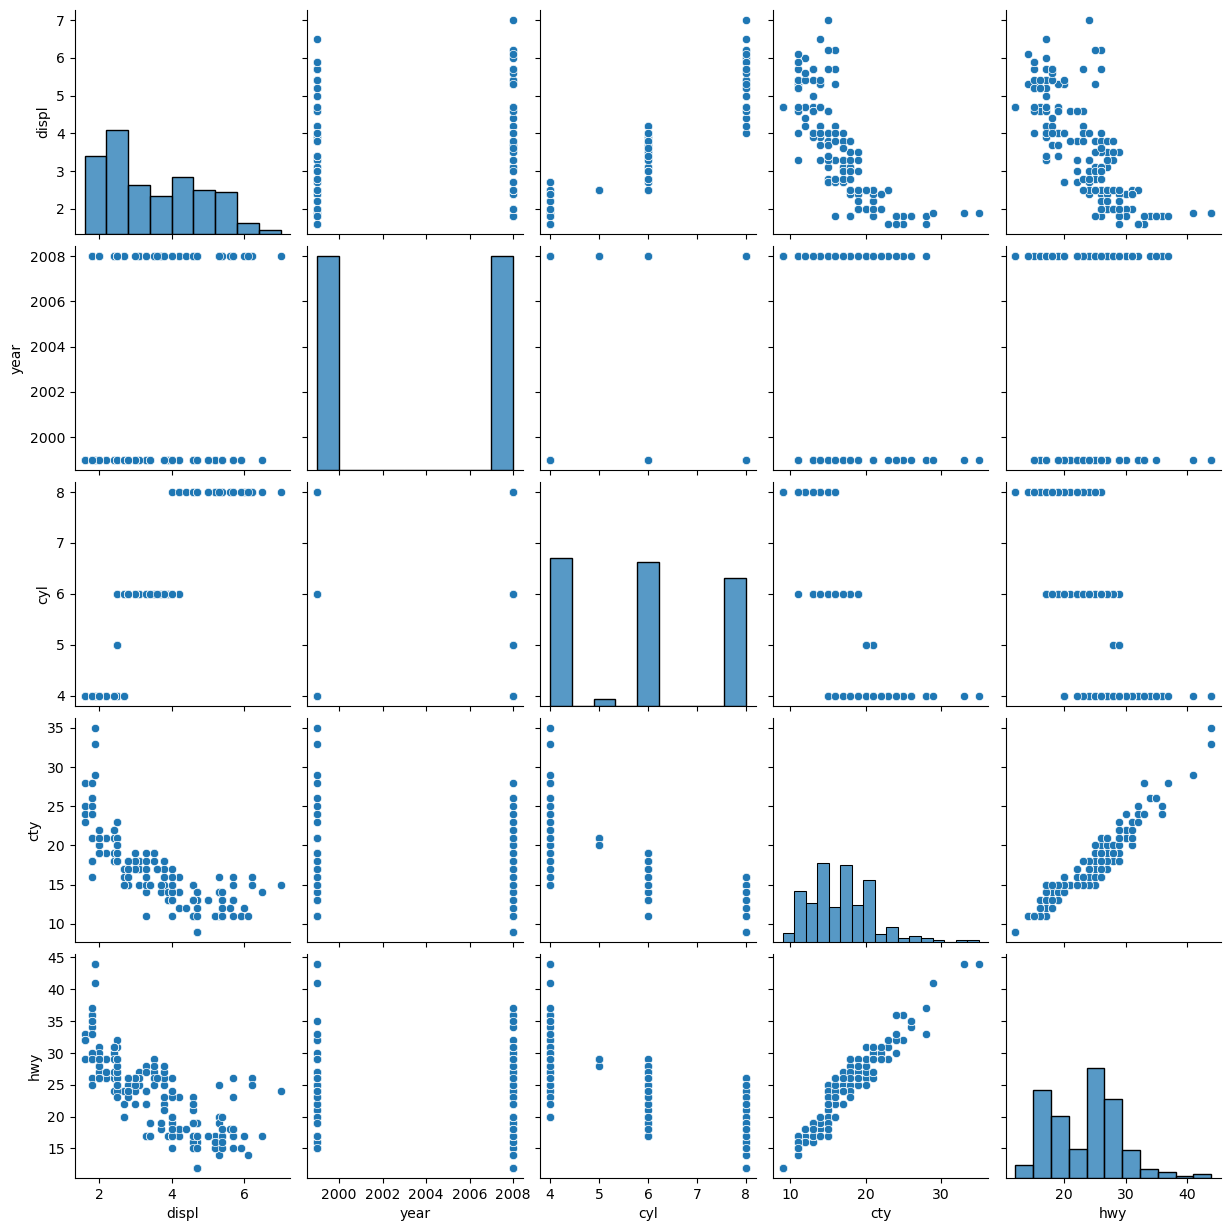

In [54]:
sns.pairplot(data=df);

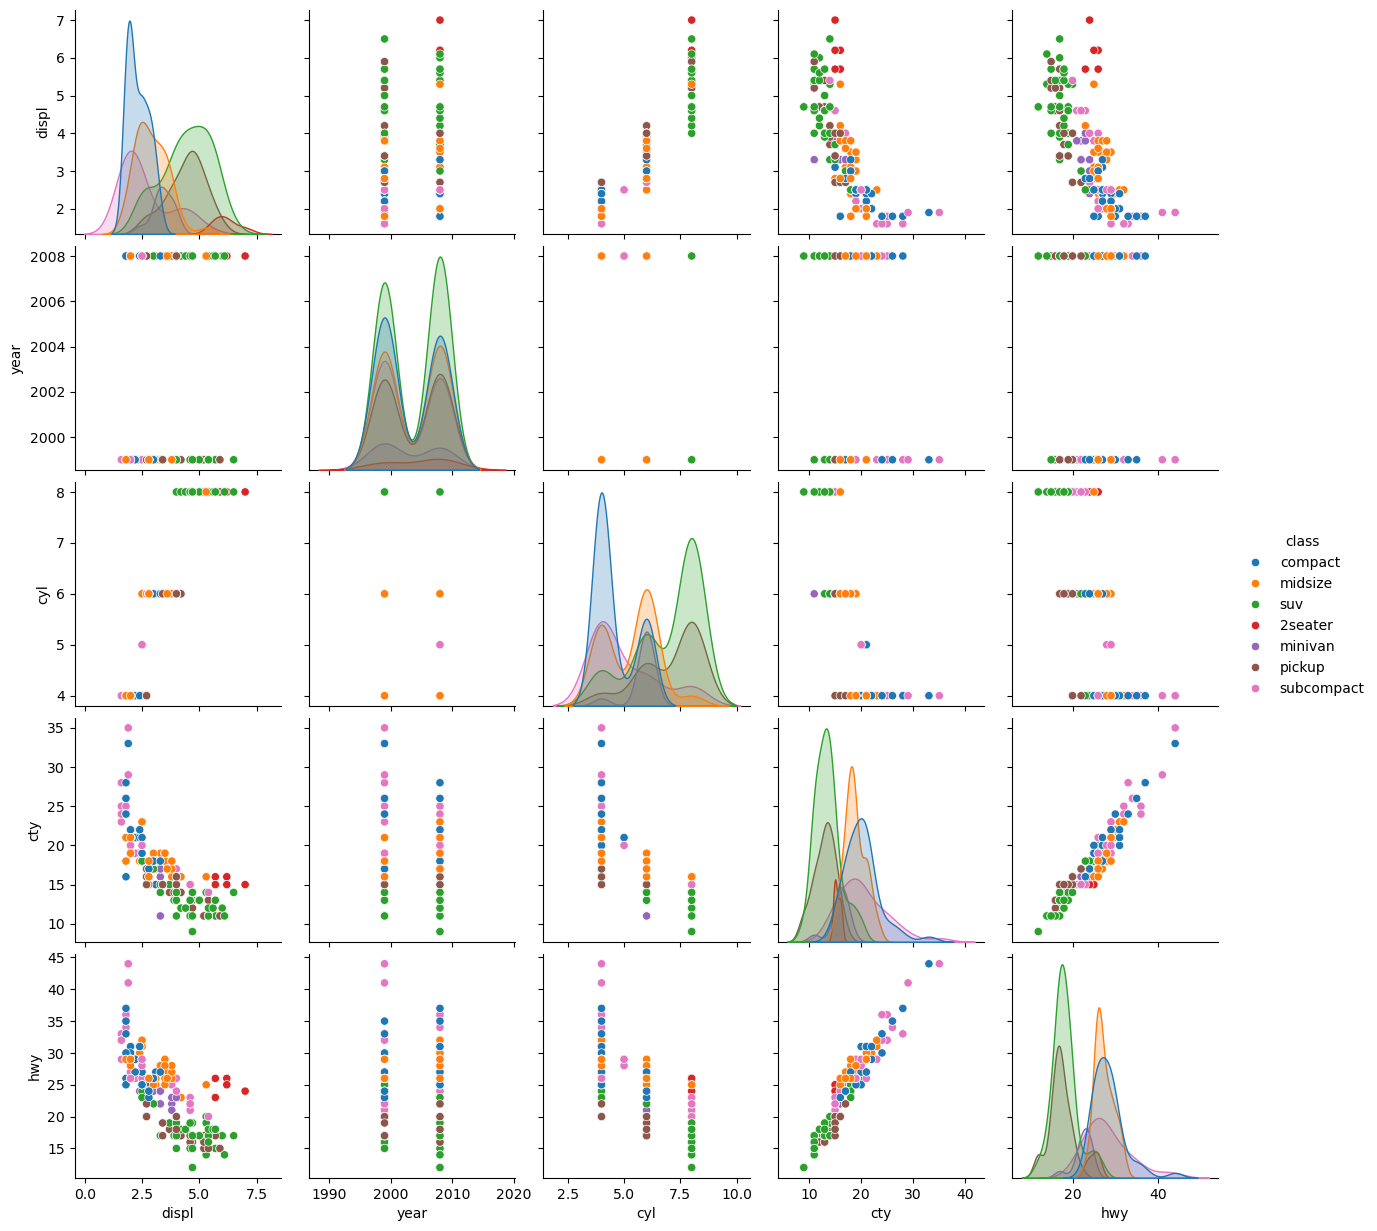

In [55]:
sns.pairplot(data=df, hue="class");